In [1]:
import numpy as np

from function_modules.function_module import *

In [2]:
# Shared directory to save results 
shared_data_dir = 'Data/parameter_testing/mutation/'

# Shared GA parameters
kwargs = {
    'cnn_model_path': '../../Models/CNN_6_1_2.keras',
    'masked_sequence': 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG',
    'seed': 0,
}

# Testing parameters
target_expressions = [0, 0.5, 1]
lineages = 10
test_cases = 11

### Testing for mutConstant
---

In [3]:
# Run for mutConstant, varying mutation rate
param_ranges = {
    'mutation_method' : ['mutConstant'],
    'mutation_rate' : np.linspace(0.01, 1.0, test_cases)
}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}mutConstant_1.csv')

Processing combinations:   0%|          | 0/330 [00:00<?, ?it/s]

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 330/330 [14:35<00:00,  2.65s/it, Elapsed=14.60min, ETA=0.00s]  


Optimal mutation_rate for error: 0.109 (Minimum error: 0.138)
Relationship between mutation_rate and error:
  - Correlation Coefficient (r): 0.586
  - p-value: 1.794e-11
  - Significant

Optimal mutation_rate for run_time: 0.505 (Minimum run_time: 2.347)
Relationship between mutation_rate and run_time:
  - Correlation Coefficient (r): -0.335
  - p-value: 3.519e-04
  - Significant



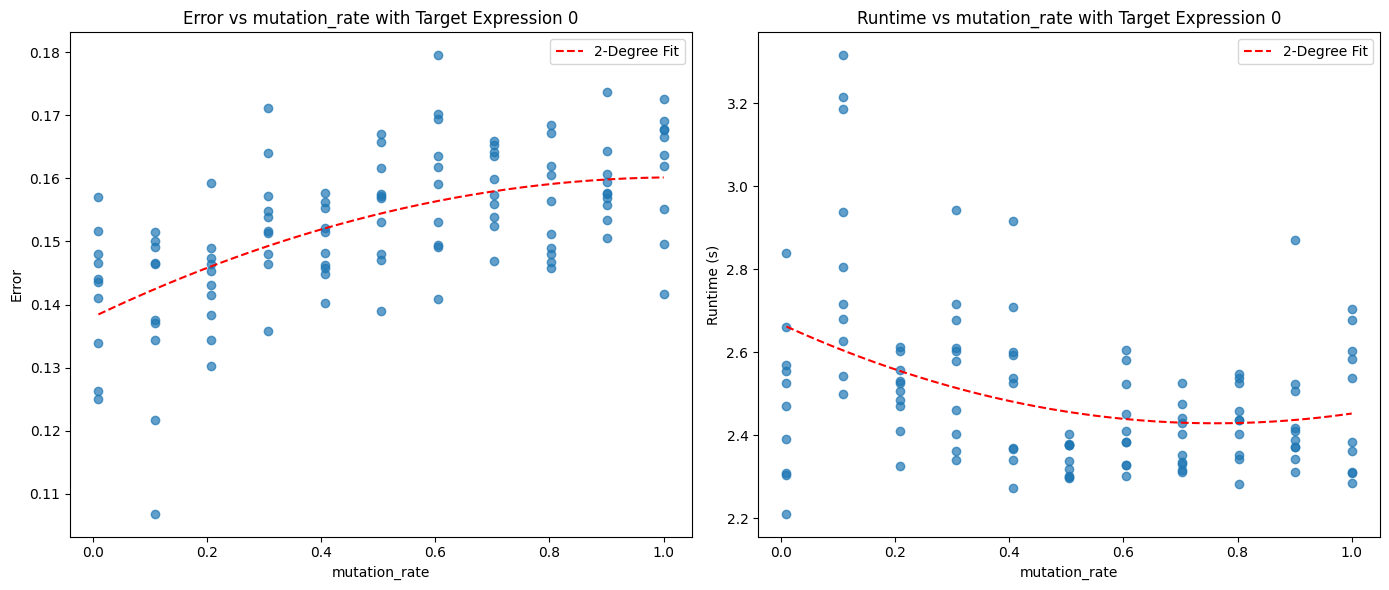

Optimal mutation_rate for error: 0.109 (Minimum error: 0.000)
Relationship between mutation_rate and error:
  - Correlation Coefficient (r): 0.222
  - p-value: 1.953e-02
  - Significant

Optimal mutation_rate for run_time: 0.109 (Minimum run_time: 2.382)
Relationship between mutation_rate and run_time:
  - Correlation Coefficient (r): 0.068
  - p-value: 4.824e-01
  - Not Significant



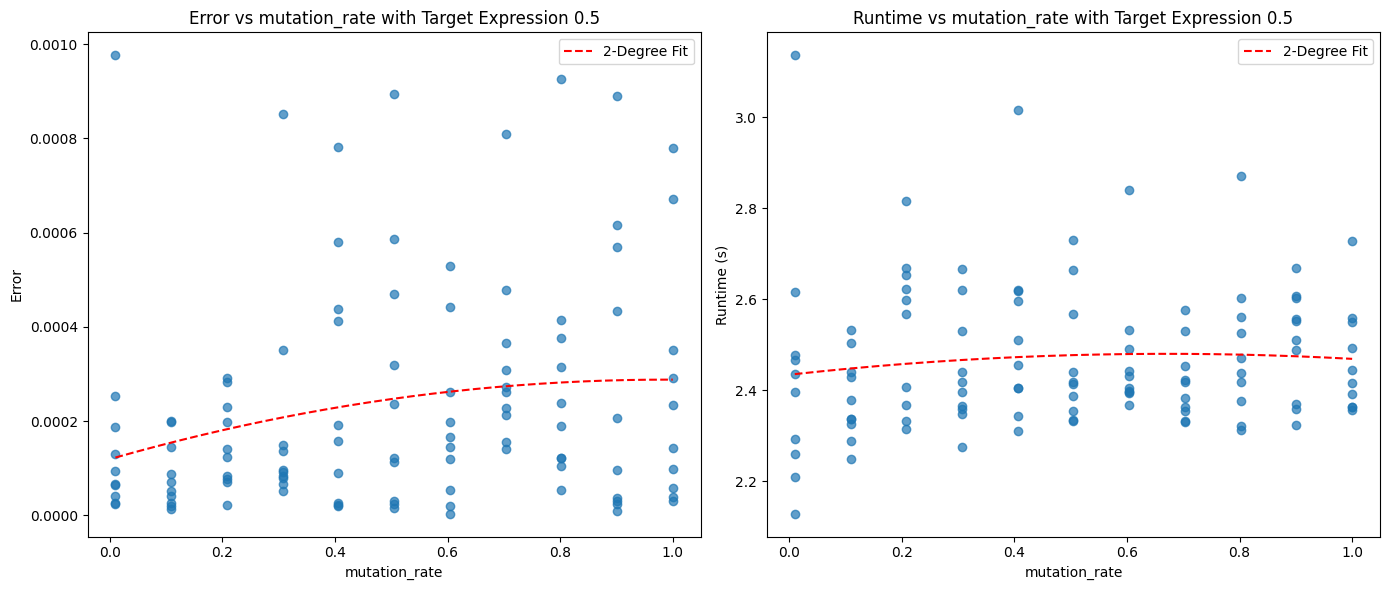

Optimal mutation_rate for error: 0.01 (Minimum error: 0.182)
Relationship between mutation_rate and error:
  - Correlation Coefficient (r): 0.614
  - p-value: 9.742e-13
  - Significant

Optimal mutation_rate for run_time: 0.6040000000000001 (Minimum run_time: 2.322)
Relationship between mutation_rate and run_time:
  - Correlation Coefficient (r): -0.366
  - p-value: 8.322e-05
  - Significant



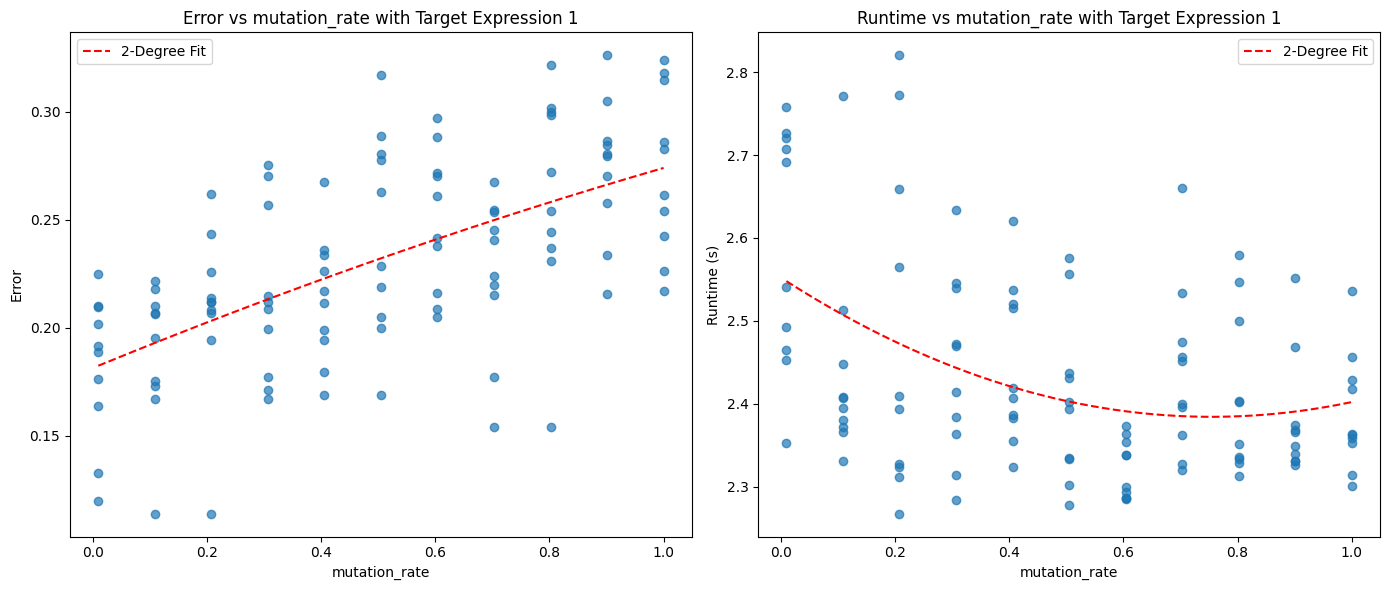

In [11]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}mutConstant_1.csv')

for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'mutation_rate', polynomial_degree=2)

In [5]:
# Run for mutConstant, varying mutation rate
param_ranges = {
    'mutation_method' : ['mutConstant'],
    'mutation_rate' : np.linspace(0, 0.2, test_cases)
}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}mutConstant_2.csv')

Processing combinations:   0%|          | 0/330 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 330/330 [13:25<00:00,  2.44s/it, Elapsed=13.42min, ETA=0.00s]  


Optimal mutation_rate for error: 0.14 (Minimum error: 0.135)
Relationship between mutation_rate and error:
  - Correlation Coefficient (r): -0.246
  - p-value: 9.557e-03
  - Significant

Optimal mutation_rate for run_time: 0.0 (Minimum run_time: 1.286)
Relationship between mutation_rate and run_time:
  - Correlation Coefficient (r): 0.675
  - p-value: 5.751e-16
  - Significant



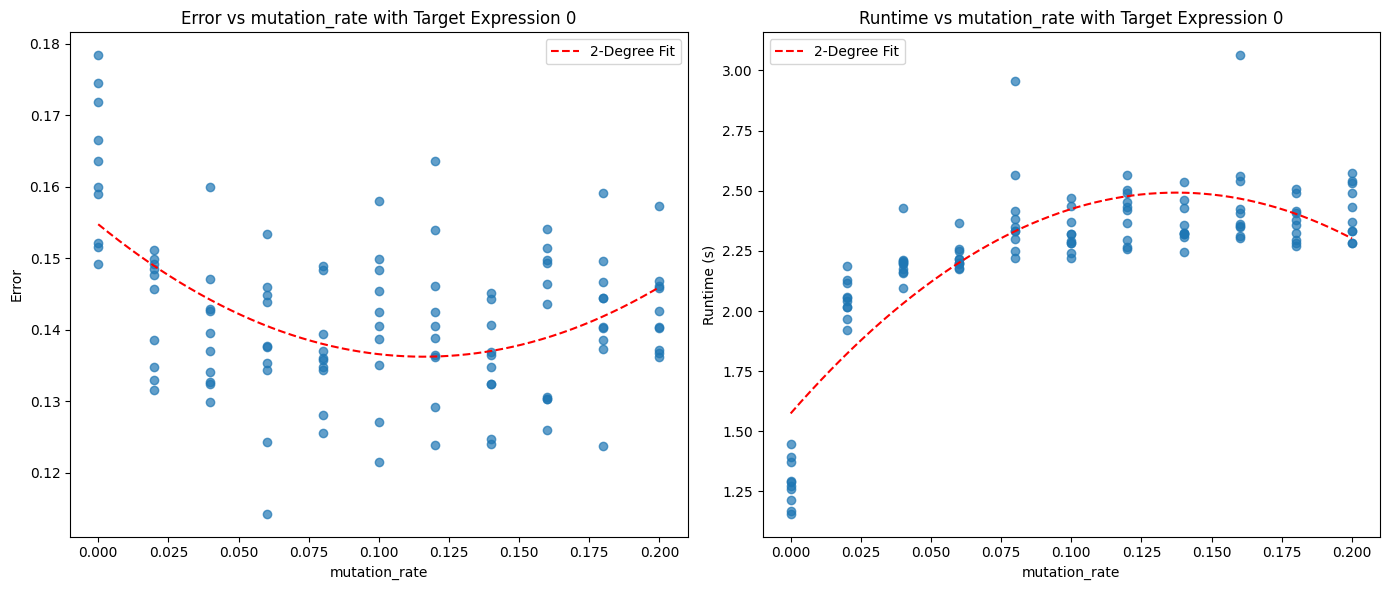

Optimal mutation_rate for error: 0.08 (Minimum error: 0.000)
Relationship between mutation_rate and error:
  - Correlation Coefficient (r): -0.283
  - p-value: 2.784e-03
  - Significant

Optimal mutation_rate for run_time: 0.0 (Minimum run_time: 1.306)
Relationship between mutation_rate and run_time:
  - Correlation Coefficient (r): 0.635
  - p-value: 9.787e-14
  - Significant



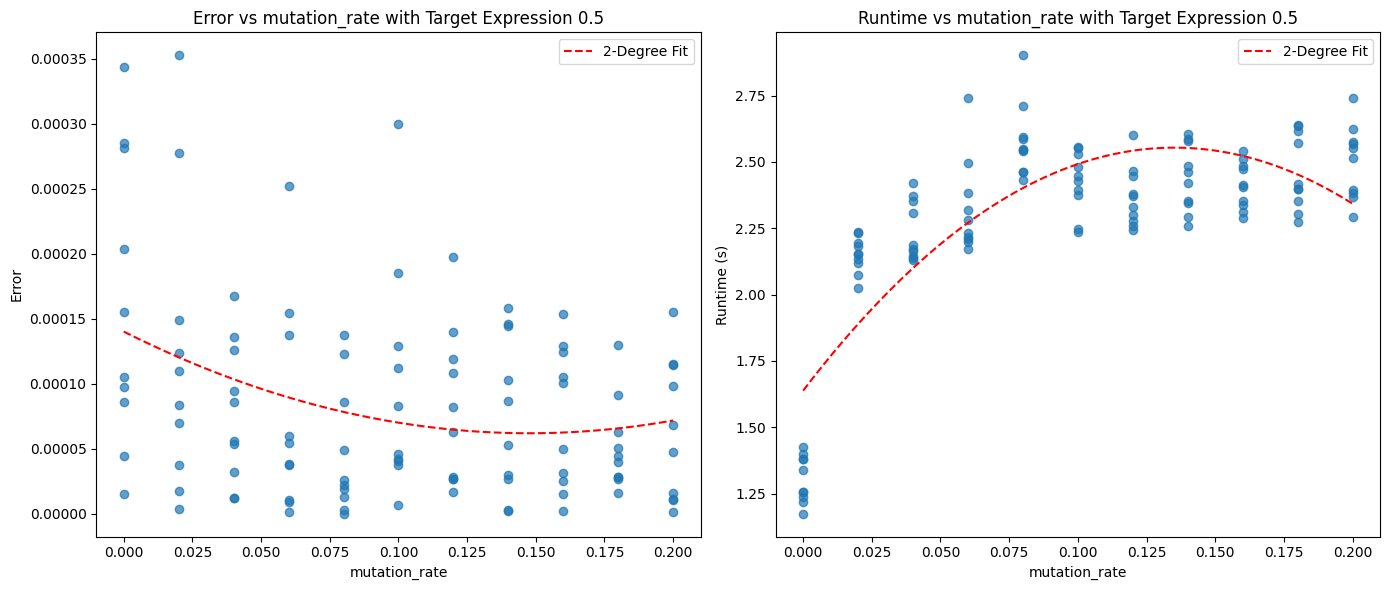

Optimal mutation_rate for error: 0.14 (Minimum error: 0.156)
Relationship between mutation_rate and error:
  - Correlation Coefficient (r): -0.321
  - p-value: 6.336e-04
  - Significant

Optimal mutation_rate for run_time: 0.0 (Minimum run_time: 1.279)
Relationship between mutation_rate and run_time:
  - Correlation Coefficient (r): 0.569
  - p-value: 8.846e-11
  - Significant



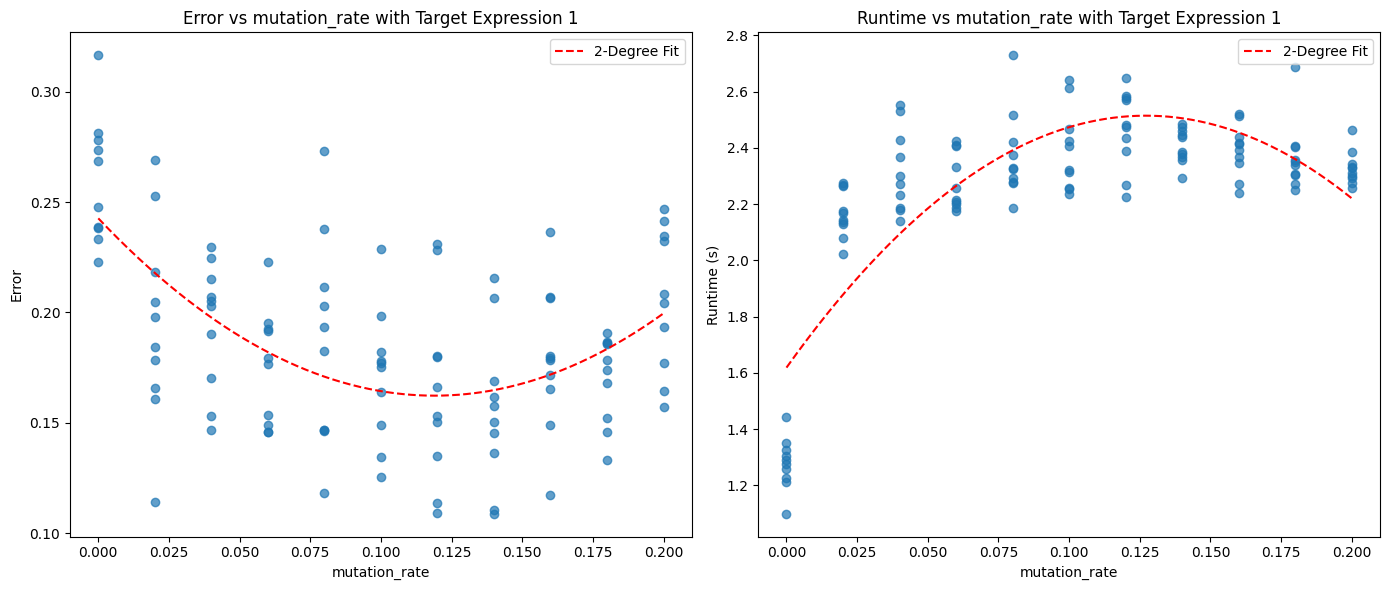

In [5]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}mutConstant_2.csv')

for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'mutation_rate', polynomial_degree=2)

In [7]:
# Test to see if mutation_prob affects the optimal mutation_rate

param_ranges = {
    'mutation_method' : ['mutConstant'],
    'mutation_prob' : np.linspace(0, 1, test_cases),
    'mutation_rate' : np.linspace(0, 1, test_cases)
}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}mutConstant_3.csv')

Processing combinations:   0%|          | 0/3630 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 3630/3630 [3:24:19<00:00,  3.38s/it, Elapsed=3.41h, ETA=0.00s]     


Optimal mutation_prob for error: 0.600
Optimal mutation_rate for error: 0.100
  - Average error: 0.133

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal mutation_prob for run_time: 0.000
Optimal mutation_rate for run_time: 0.400
  - Average run_time: 1.191

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



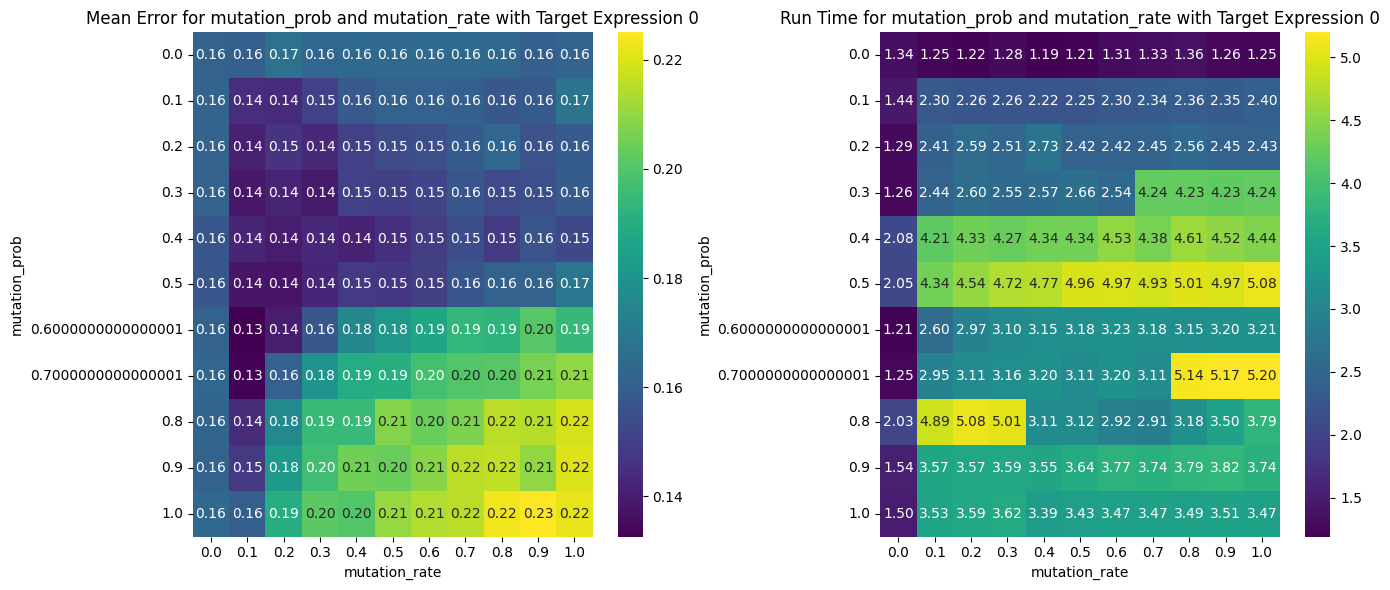

Optimal mutation_prob for error: 0.200
Optimal mutation_rate for error: 0.100
  - Average error: 0.000

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal mutation_prob for run_time: 0.600
Optimal mutation_rate for run_time: 0.000
  - Average run_time: 1.214

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



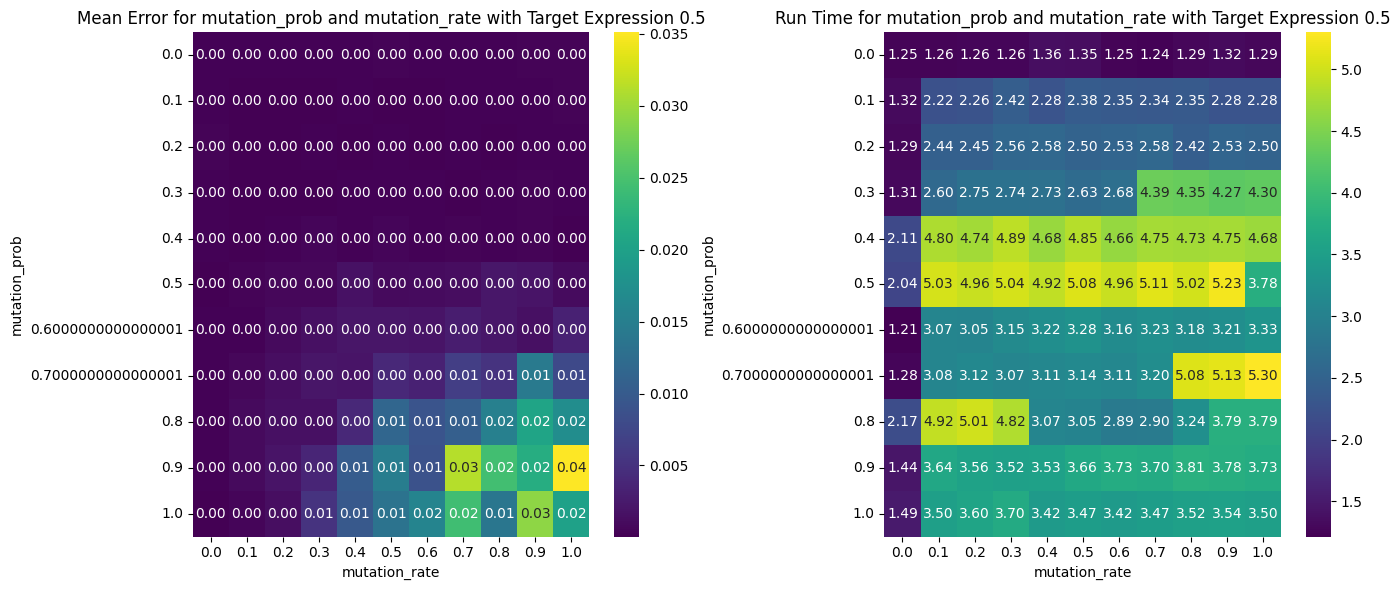

Optimal mutation_prob for error: 0.400
Optimal mutation_rate for error: 0.100
  - Average error: 0.145

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal mutation_prob for run_time: 0.600
Optimal mutation_rate for run_time: 0.000
  - Average run_time: 1.171

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



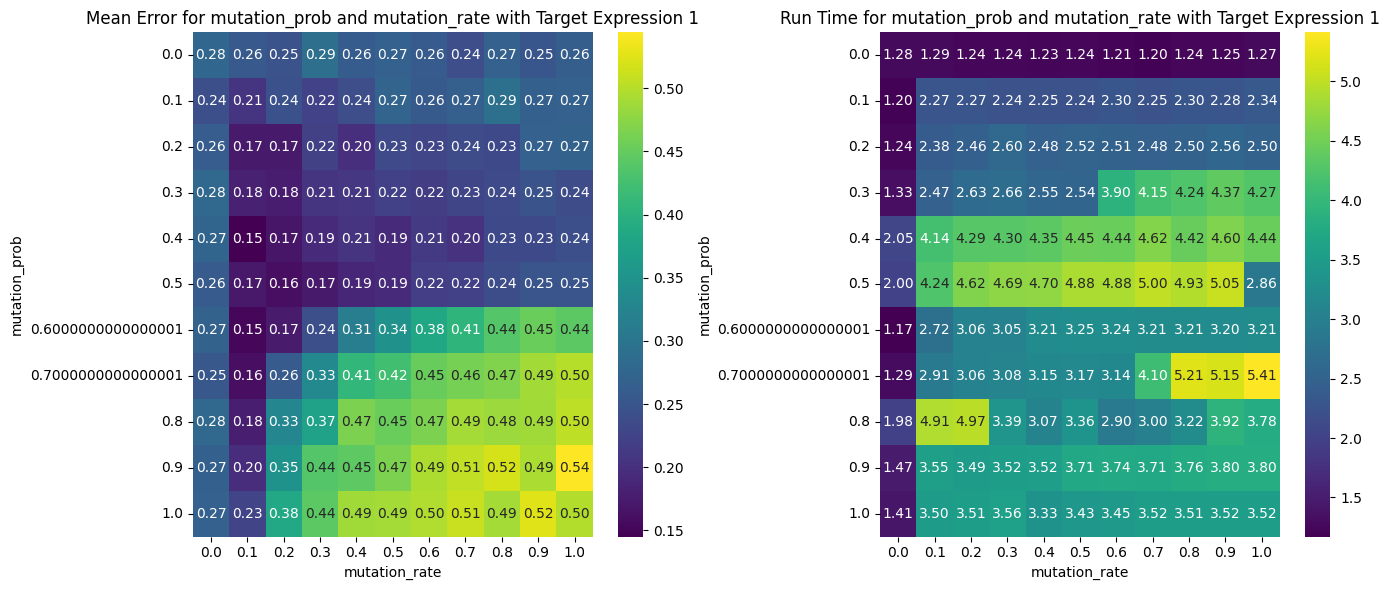

In [6]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}mutConstant_3.csv')

for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'mutation_prob', 'mutation_rate')

### Testing for mutLinear
---

In [9]:
# Find optimal mutation_rate_start and mutation_rate_end for mutLinear

param_ranges = {
    'mutation_method' : ['mutLinear'],
    'mutation_rate_start' : np.linspace(0, 1, test_cases),
    'mutation_rate_end' : np.linspace(1, 0, test_cases)
}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}mutLinear.csv')

Processing combinations:   0%|          | 0/3630 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 3630/3630 [2:42:44<00:00,  2.69s/it, Elapsed=2.71h, ETA=0.00s]     


Optimal mutation_rate_start for error: 0.100
Optimal mutation_rate_end for error: 0.100
  - Average error: 0.136

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal mutation_rate_start for run_time: 0.000
Optimal mutation_rate_end for run_time: 0.000
  - Average run_time: 1.313

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



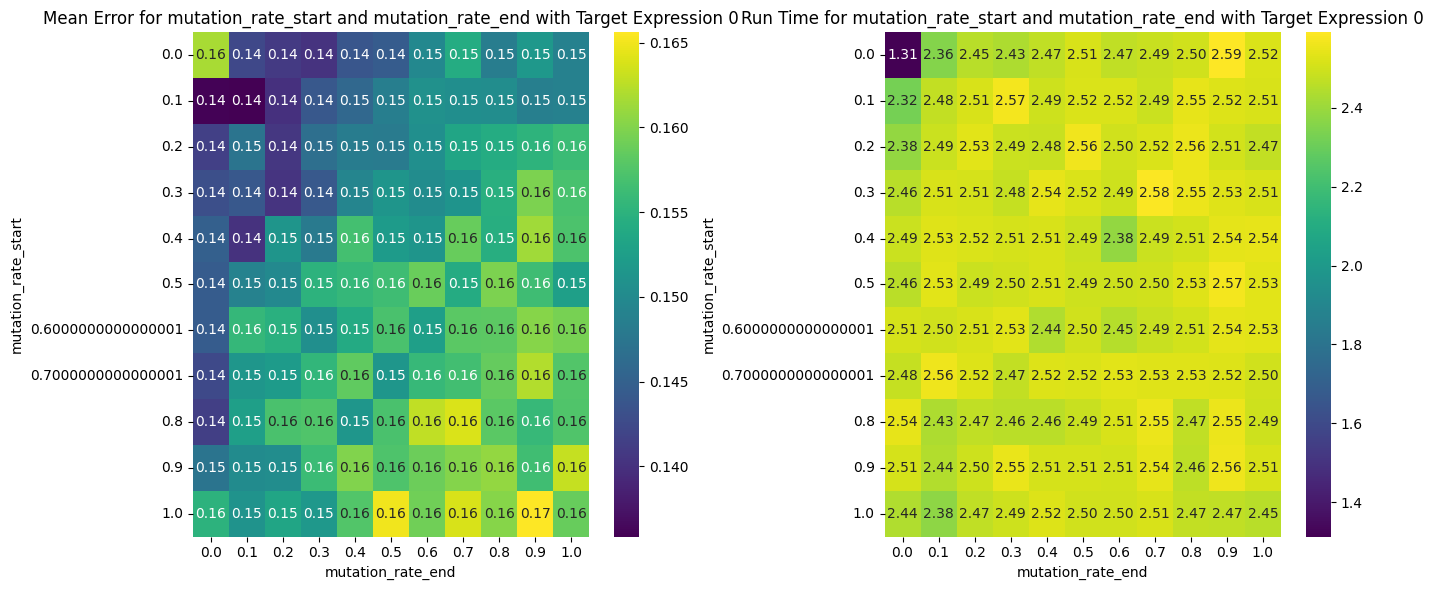

Optimal mutation_rate_start for error: 0.100
Optimal mutation_rate_end for error: 0.500
  - Average error: 0.000

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal mutation_rate_start for run_time: 0.000
Optimal mutation_rate_end for run_time: 0.000
  - Average run_time: 1.320

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



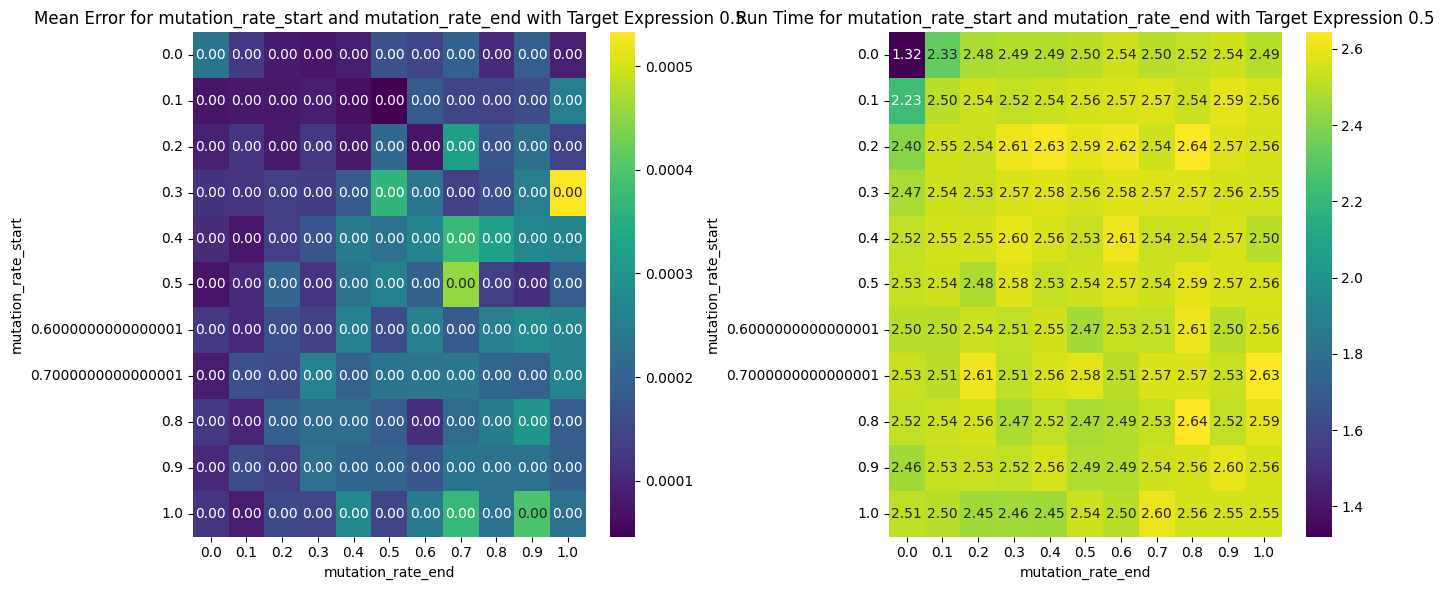

Optimal mutation_rate_start for error: 0.400
Optimal mutation_rate_end for error: 0.100
  - Average error: 0.172

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal mutation_rate_start for run_time: 0.000
Optimal mutation_rate_end for run_time: 0.000
  - Average run_time: 1.289

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



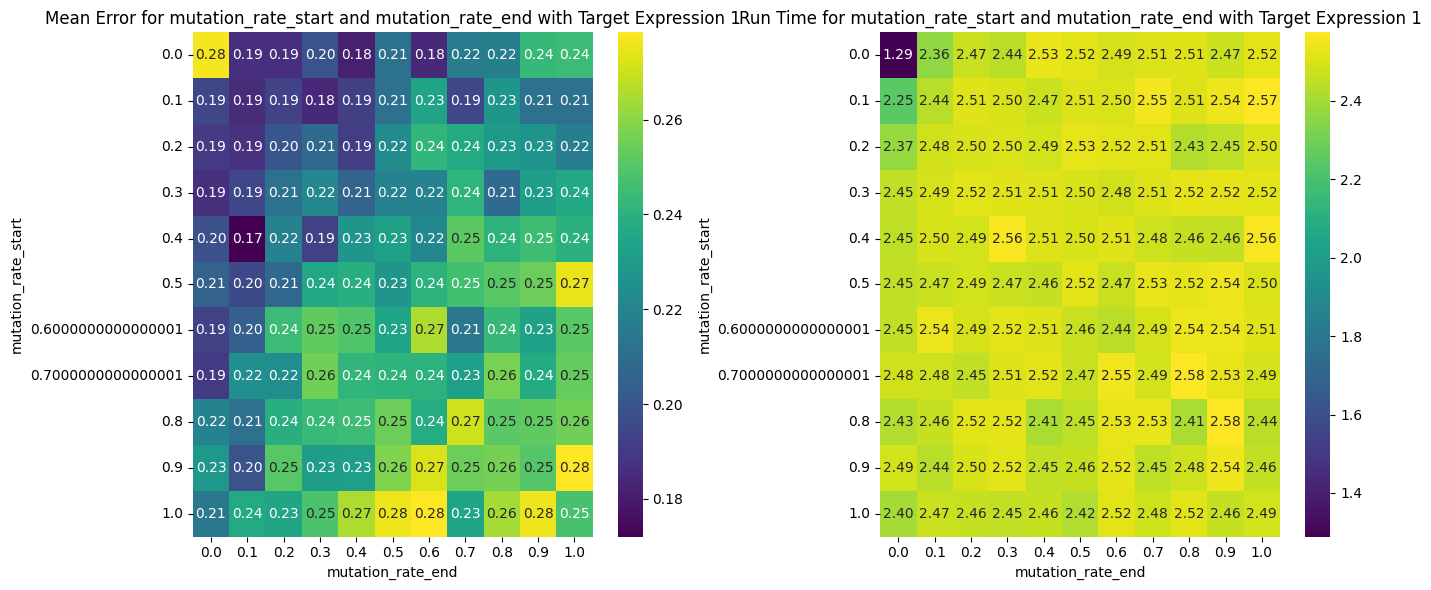

In [7]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}mutLinear.csv')

for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'mutation_rate_start', 'mutation_rate_end')

### Testing for mutExponential
---

In [11]:
# Find optimal mutation_rate_start and mutation_rate_end for mutExponential

param_ranges = {
    'mutation_method' : ['mutExponential'],
    'mutation_rate_start' : np.linspace(0, 1, test_cases),
    'mutation_rate_end' : np.linspace(1, 0, test_cases)

}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}mutExponential_1.csv')

Processing combinations:   0%|          | 0/3630 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 3630/3630 [2:39:56<00:00,  2.64s/it, Elapsed=2.67h, ETA=0.00s]     


Optimal mutation_rate_start for error: 0.100
Optimal mutation_rate_end for error: 0.100
  - Average error: 0.137

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal mutation_rate_start for run_time: 0.000
Optimal mutation_rate_end for run_time: 0.000
  - Average run_time: 1.273

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



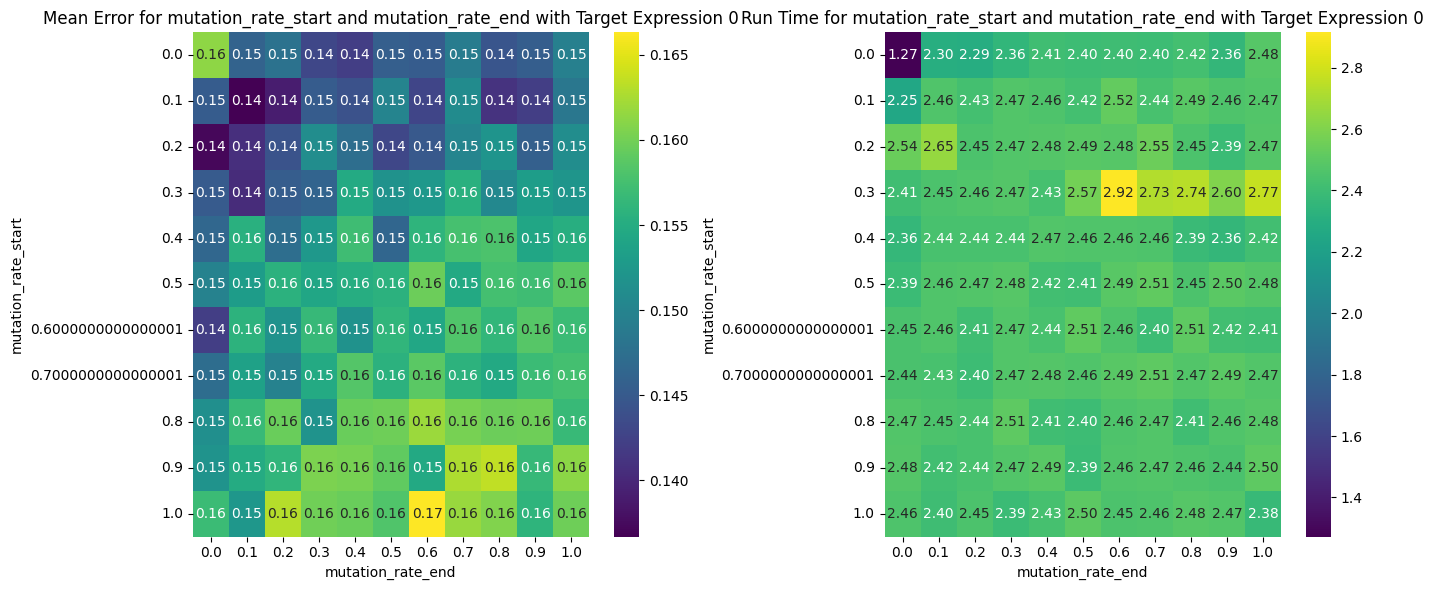

Optimal mutation_rate_start for error: 0.000
Optimal mutation_rate_end for error: 0.900
  - Average error: 0.000

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal mutation_rate_start for run_time: 0.000
Optimal mutation_rate_end for run_time: 0.000
  - Average run_time: 1.333

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



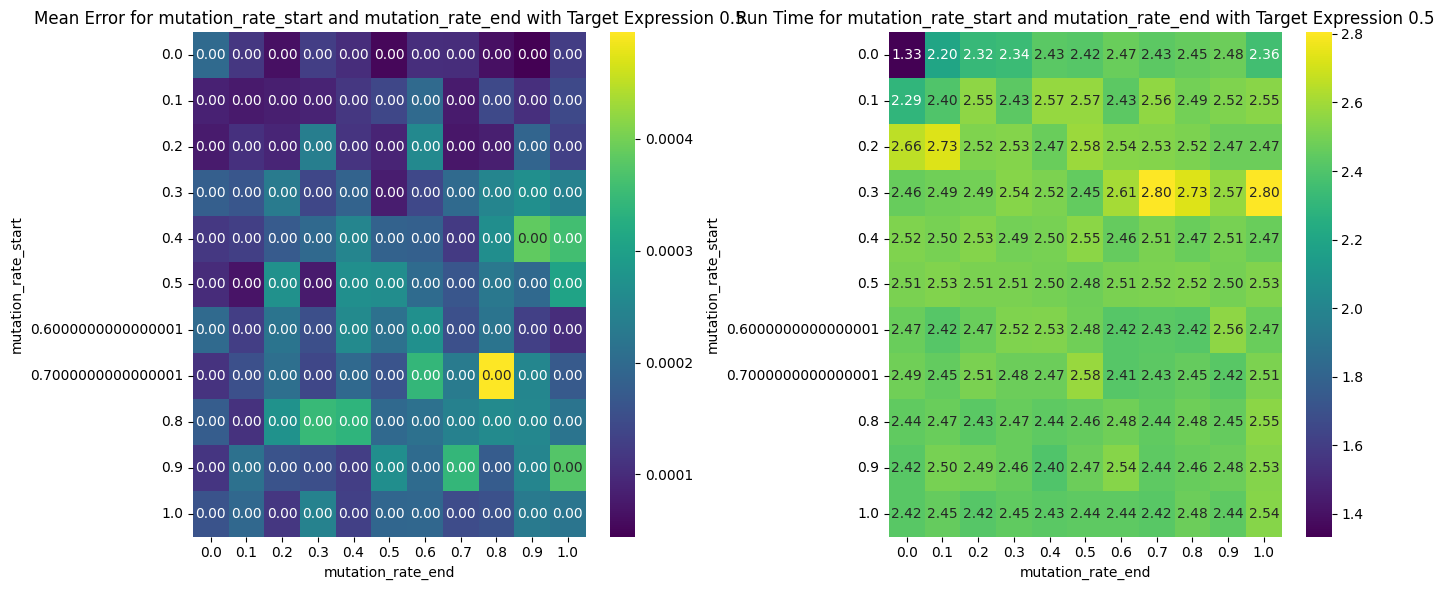

Optimal mutation_rate_start for error: 0.200
Optimal mutation_rate_end for error: 0.100
  - Average error: 0.166

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal mutation_rate_start for run_time: 0.000
Optimal mutation_rate_end for run_time: 0.000
  - Average run_time: 1.201

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



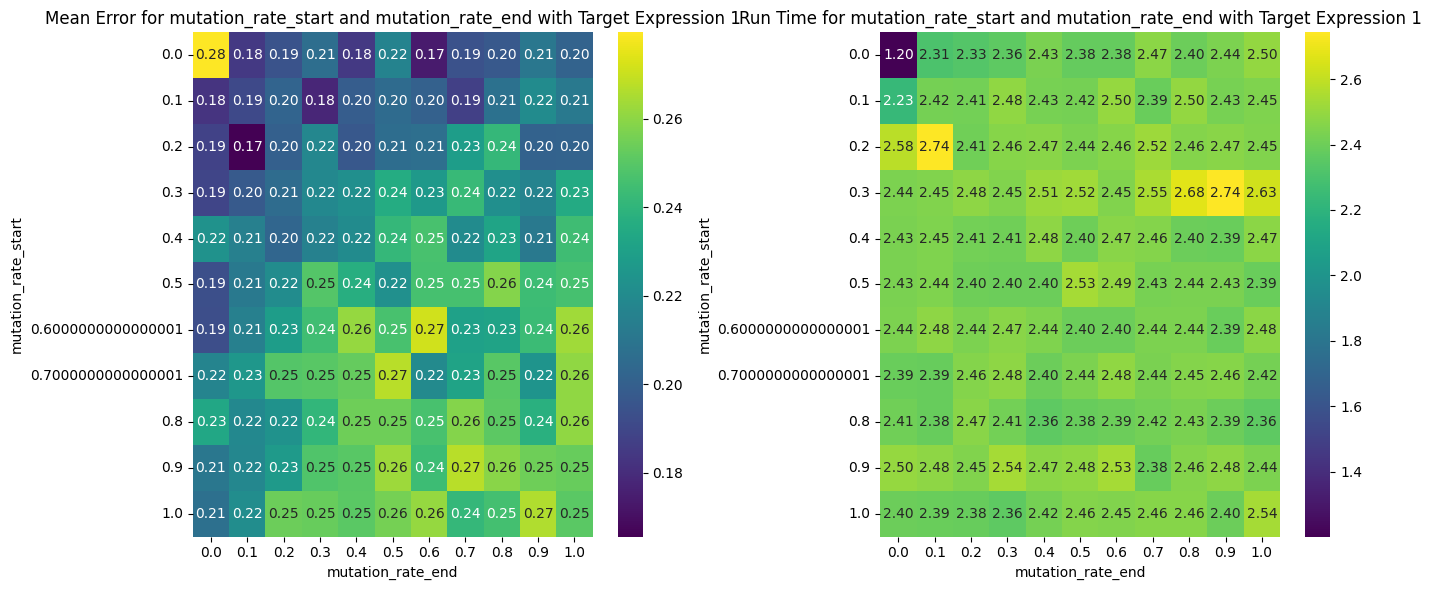

In [8]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}mutExponential_1.csv')

for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'mutation_rate_start', 'mutation_rate_end')

In [13]:
# Find optimal mutation_rate_start and mutation_rate_end for mutExponential
# We could have tested negative degrees, but because high degrees are better, we only need to test positive

param_ranges = {
    'mutation_method' : ['mutExponential'],
    'mutation_rate_start' : [0.1],
    'mutation_rate_end' : [1],
    'mutation_rate_degree' : [1, 2, 3, 4]

}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}mutExponential_2.csv')

Processing combinations:   0%|          | 0/120 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 120/120 [05:15<00:00,  2.63s/it, Elapsed=5.26min, ETA=0.00s] 


Optimal mutation_rate_degree for error: 4 (Minimum error: 0.143)
Relationship between mutation_rate_degree and error:
  - Correlation Coefficient (r): -0.282
  - p-value: 7.758e-02
  - Not Significant

Optimal mutation_rate_degree for run_time: 3 (Minimum run_time: 2.438)
Relationship between mutation_rate_degree and run_time:
  - Correlation Coefficient (r): 0.006
  - p-value: 9.697e-01
  - Not Significant



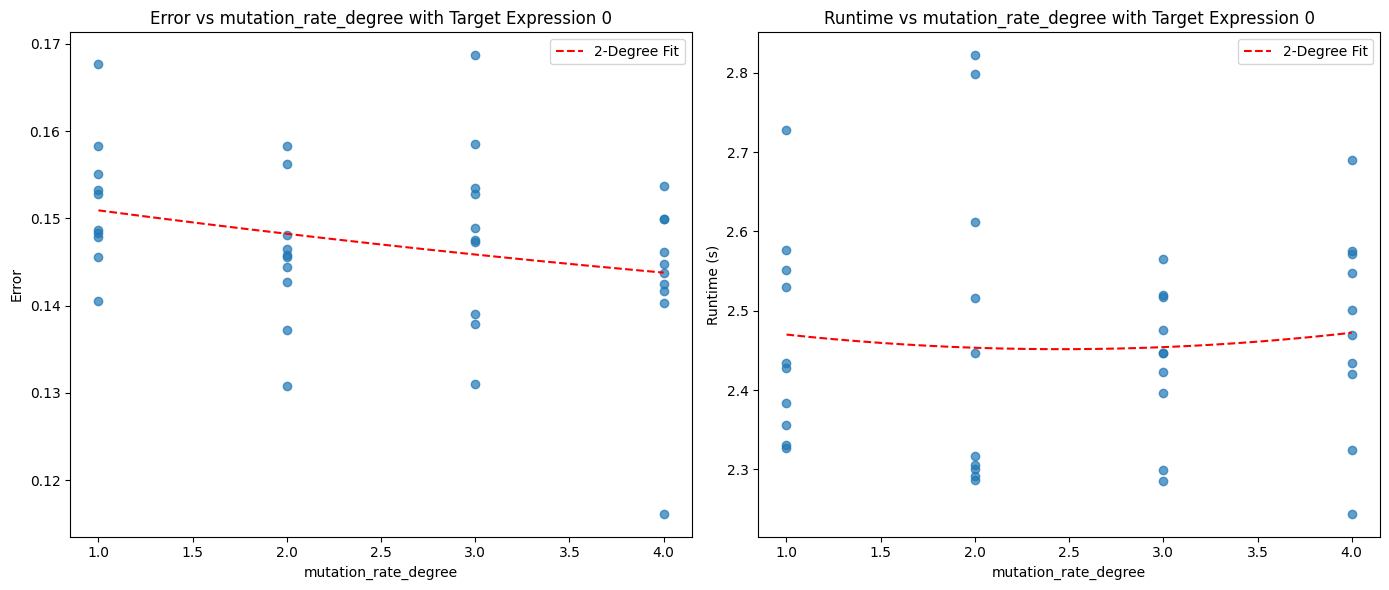

Optimal mutation_rate_degree for error: 4 (Minimum error: 0.000)
Relationship between mutation_rate_degree and error:
  - Correlation Coefficient (r): -0.449
  - p-value: 3.680e-03
  - Significant

Optimal mutation_rate_degree for run_time: 4 (Minimum run_time: 2.433)
Relationship between mutation_rate_degree and run_time:
  - Correlation Coefficient (r): -0.007
  - p-value: 9.669e-01
  - Not Significant



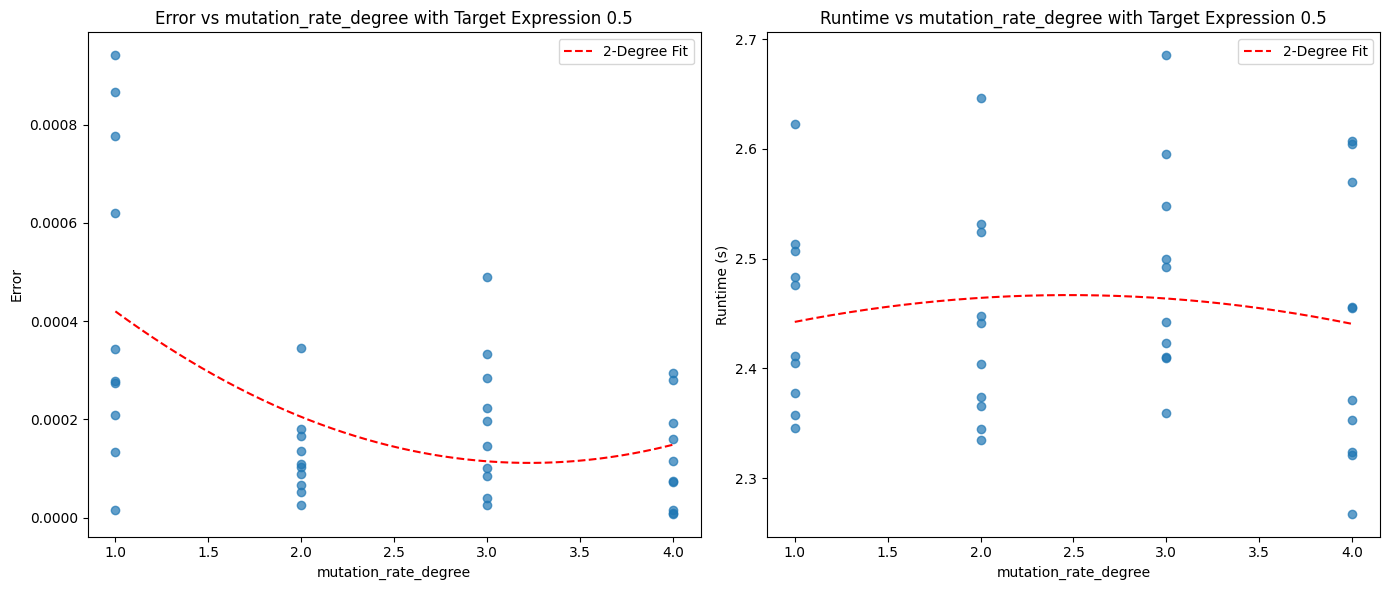

Optimal mutation_rate_degree for error: 4 (Minimum error: 0.199)
Relationship between mutation_rate_degree and error:
  - Correlation Coefficient (r): -0.383
  - p-value: 1.466e-02
  - Significant

Optimal mutation_rate_degree for run_time: 4 (Minimum run_time: 2.402)
Relationship between mutation_rate_degree and run_time:
  - Correlation Coefficient (r): -0.122
  - p-value: 4.533e-01
  - Not Significant



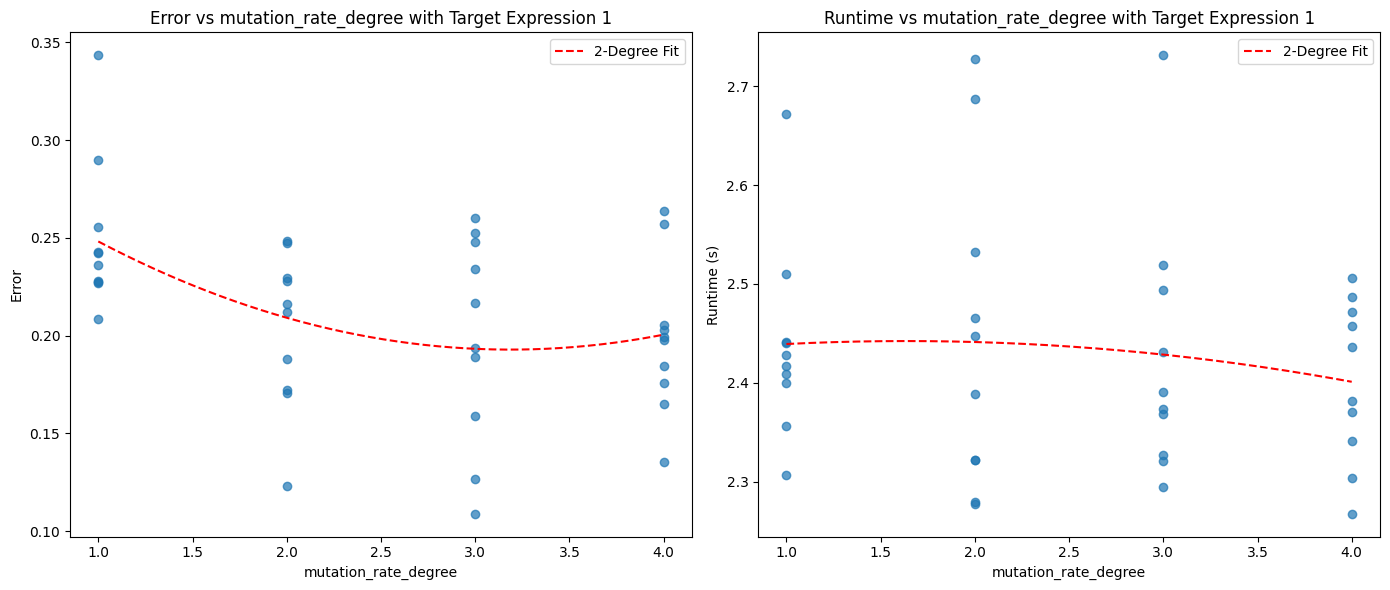

In [9]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}mutExponential_2.csv')

for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'mutation_rate_degree', polynomial_degree=2)

### Testing for mutEntropy
---

In [6]:
# Find optimal mutation_rate_start and mutation_rate_end for mutEntropy

param_ranges = {
    'mutation_method' : ['mutEntropy'],
    'mutation_rate_start' : np.linspace(0, 1, test_cases),
    'mutation_rate_end' : np.linspace(1, 0, test_cases)

}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}mutEntropy_2.csv')

Processing combinations:   0%|          | 0/3630 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 3630/3630 [9:39:09<00:00,  9.57s/it, Elapsed=9.65h, ETA=0.00s]     


Optimal mutation_rate_start for error: 0.000
Optimal mutation_rate_end for error: 0.100
  - Average error: 0.131

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal mutation_rate_start for run_time: 0.000
Optimal mutation_rate_end for run_time: 0.000
  - Average run_time: 4.841

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



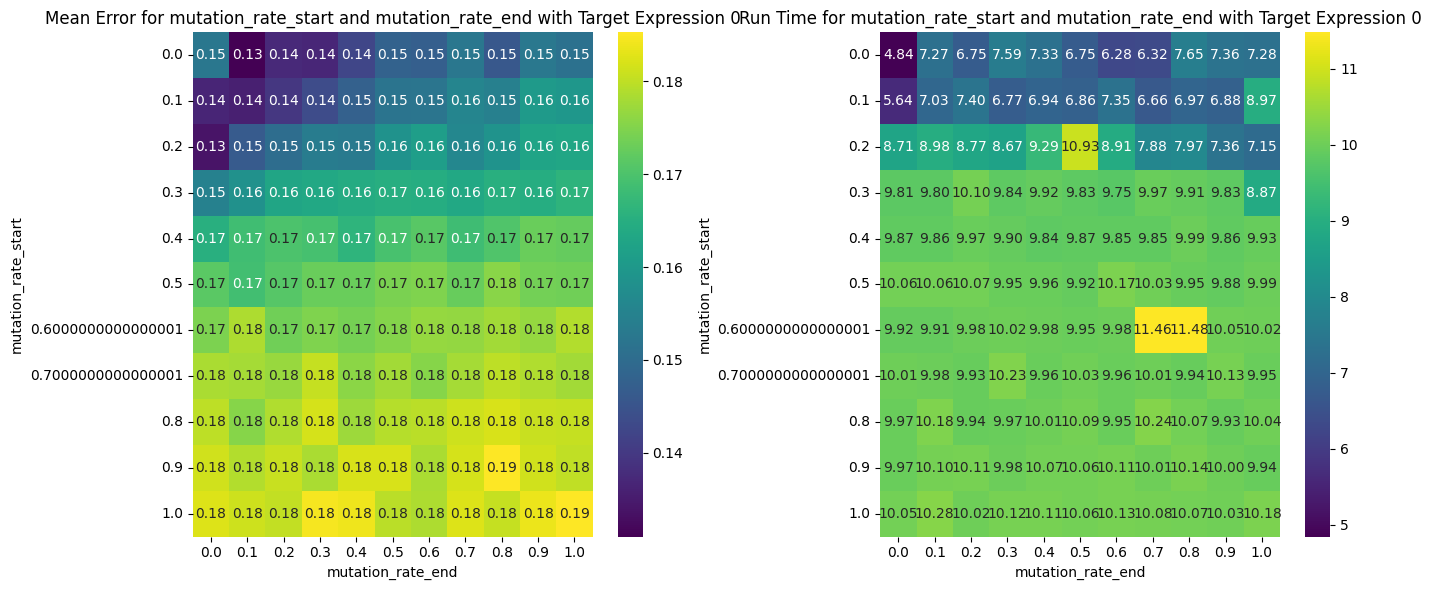

Optimal mutation_rate_start for error: 0.000
Optimal mutation_rate_end for error: 1.000
  - Average error: 0.000

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal mutation_rate_start for run_time: 0.000
Optimal mutation_rate_end for run_time: 0.000
  - Average run_time: 4.811

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



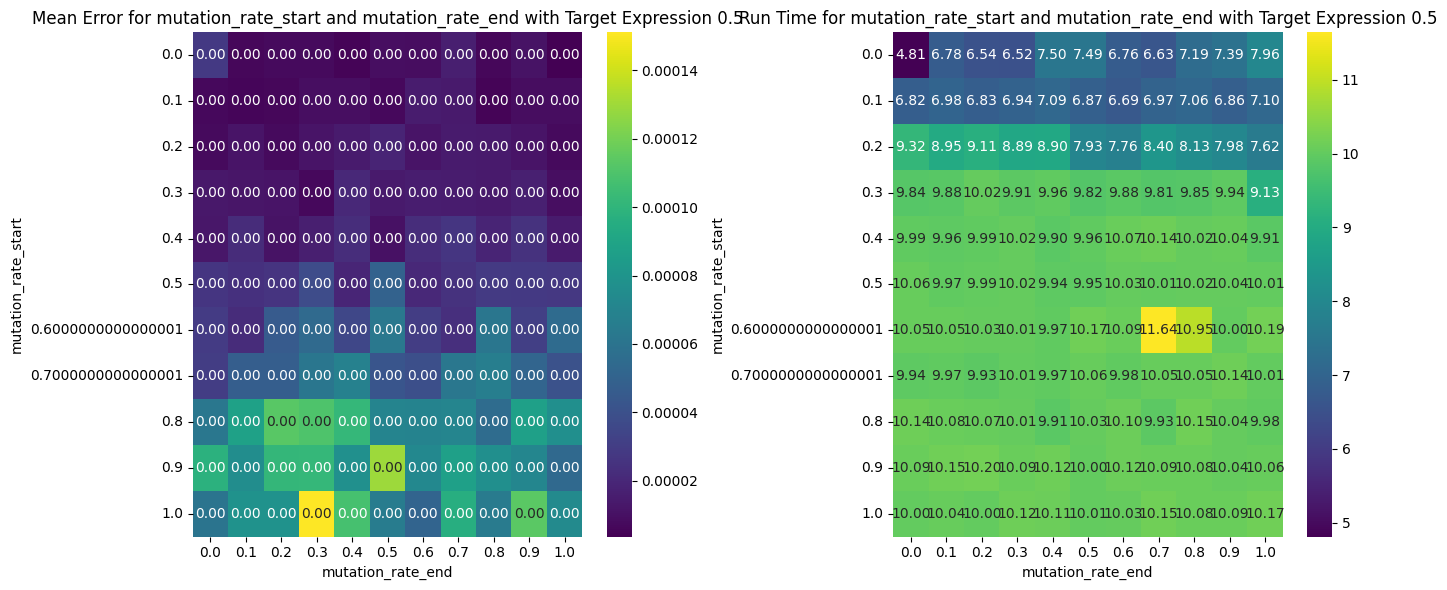

Optimal mutation_rate_start for error: 0.200
Optimal mutation_rate_end for error: 0.000
  - Average error: 0.126

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal mutation_rate_start for run_time: 0.000
Optimal mutation_rate_end for run_time: 0.000
  - Average run_time: 4.436

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



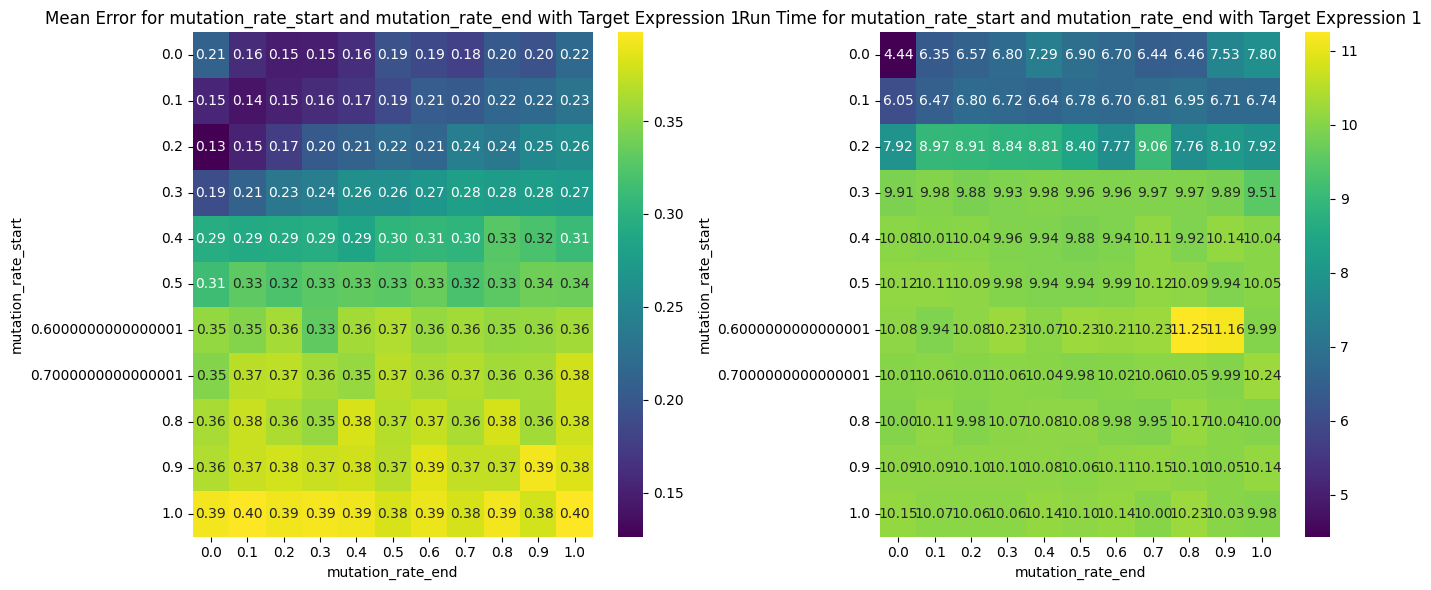

In [7]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}mutEntropy_2.csv')

for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'mutation_rate_start', 'mutation_rate_end')

### Comparing all methods
---

In [4]:
# Evaluate mutConstant
param_ranges = {
    'mutation_method' : ['mutConstant'],
    'mutation_rate' : [0.1],
    'mutation_prob' : [0.6]
}
mutConstant_df = test_params(param_ranges, target_expressions, lineages, kwargs)

# Evaluate mutLinear
param_ranges = {
    'mutation_method' : ['mutLinear'],
    'mutation_rate_start' : [0.1],
    'mutation_rate_end' : [0.1],
}
mutLinear_df = test_params(param_ranges, target_expressions, lineages, kwargs)

# Evaluate mutExponential
param_ranges = {
    'mutation_method' : ['mutExponential'],
    'mutation_rate_start' : [0.1],
    'mutation_rate_start' : [0.1],
}
mutExponential_df = test_params(param_ranges, target_expressions, lineages, kwargs)

# Evaluate mutEntropy
param_ranges = {
    'mutation_method' : ['mutEntropy'],
    'mutation_rate_start' : [0],
    'mutation_rate_start' : [1],
}
mutEntropy_df = test_params(param_ranges, target_expressions, lineages, kwargs)

# Concatenate all results, and save to csv
results_df = pd.concat([mutConstant_df, mutLinear_df, mutExponential_df, mutEntropy_df])
results_df.to_csv(f'{shared_data_dir}mutation_comparison.csv', index=False)

Processing combinations: 100%|██████████| 30/30 [03:49<00:00,  7.64s/it, Elapsed=3.82min, ETA=0.00s]  


Optimal mutation_method for error: mutLinear (Average error: 0.133)
ANOVA Test for error by mutation_method:
  - F-statistic: 111.001
  - p-value: 2.984e-18
  - Significant

Optimal mutation_method for run_time: mutExponential (Average run_time: 3.036)
ANOVA Test for run_time by mutation_method:
  - F-statistic: 222.229
  - p-value: 2.818e-23
  - Significant



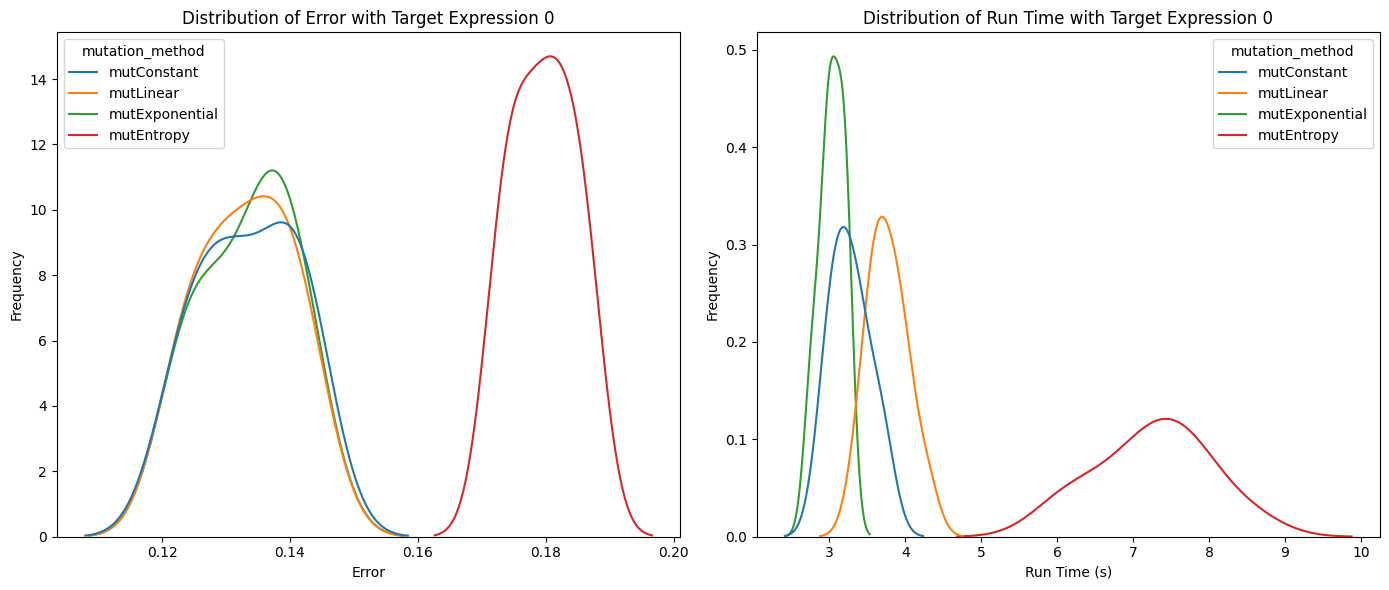

Optimal mutation_method for error: mutConstant (Average error: 0.000)
ANOVA Test for error by mutation_method:
  - F-statistic: 11.582
  - p-value: 1.840e-05
  - Significant

Optimal mutation_method for run_time: mutExponential (Average run_time: 3.133)
ANOVA Test for run_time by mutation_method:
  - F-statistic: 146.422
  - p-value: 3.172e-20
  - Significant



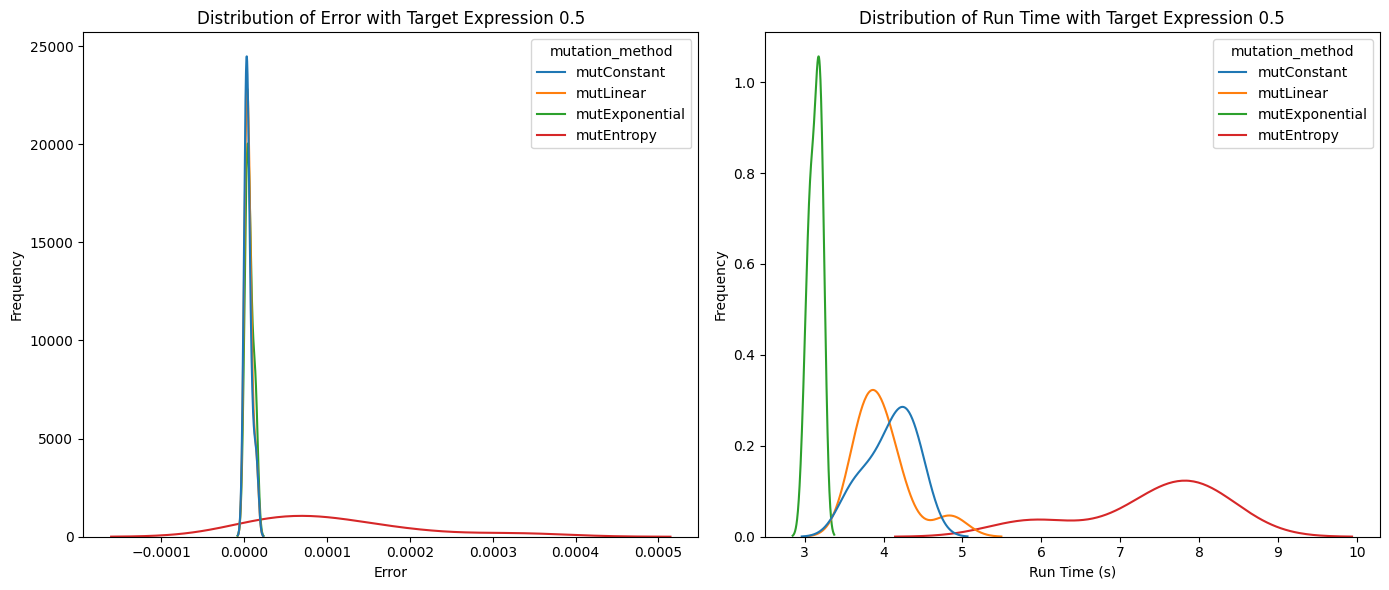

Optimal mutation_method for error: mutConstant (Average error: 0.147)
ANOVA Test for error by mutation_method:
  - F-statistic: 101.536
  - p-value: 1.256e-17
  - Significant

Optimal mutation_method for run_time: mutExponential (Average run_time: 3.153)
ANOVA Test for run_time by mutation_method:
  - F-statistic: 216.740
  - p-value: 4.315e-23
  - Significant



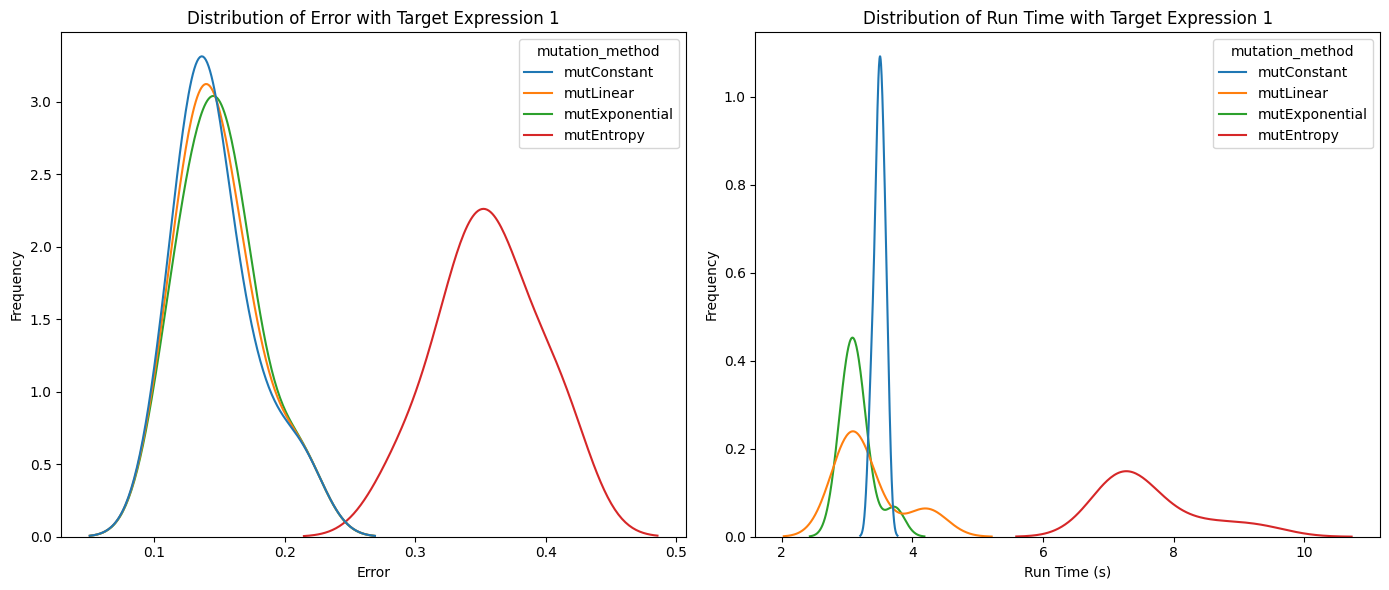

Optimal mutation_method for error: mutConstant (Average error: 0.094)
ANOVA Test for error by mutation_method:
  - F-statistic: 5.775
  - p-value: 1.025e-03
  - Significant

Optimal mutation_method for run_time: mutExponential (Average run_time: 3.108)
ANOVA Test for run_time by mutation_method:
  - F-statistic: 472.392
  - p-value: 7.841e-65
  - Significant



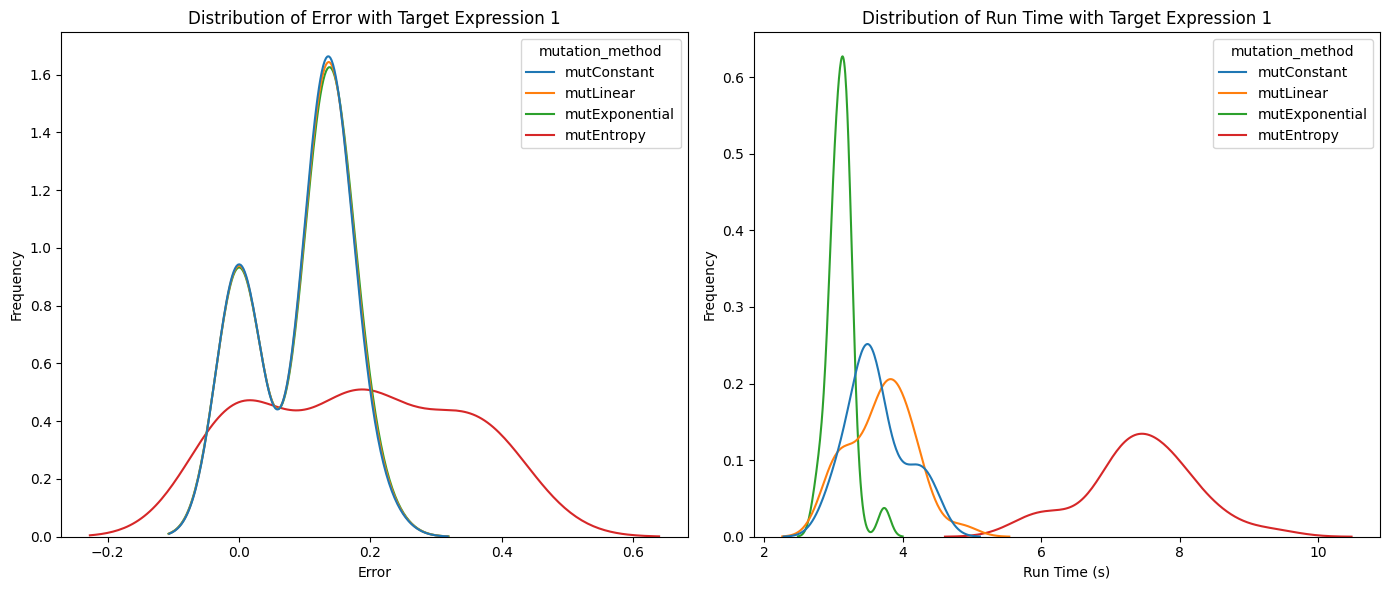

In [5]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}mutation_comparison.csv')

for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    distribution_plot(filtered_df, target_expression, 'mutation_method')

distribution_plot(results_df, target_expression, 'mutation_method')

Optimal mutation_method for error: mutConstant (Average error: 0.140)
ANOVA Test for error by mutation_method:
  - F-statistic: 30.639
  - p-value: 4.341e-13
  - Significant

Optimal mutation_method for run_time: mutExponential (Average run_time: 3.095)
ANOVA Test for run_time by mutation_method:
  - F-statistic: 401.297
  - p-value: 1.706e-46
  - Significant



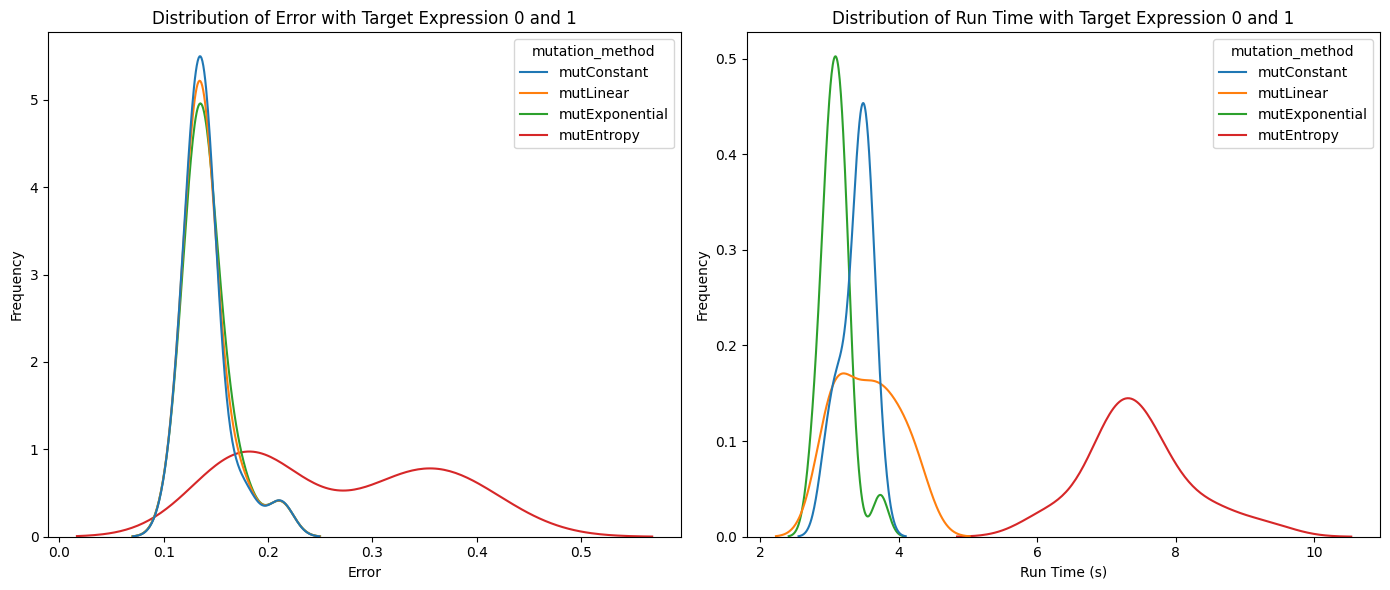

In [8]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}mutation_comparison.csv')
filtered_df = results_df[results_df['target_expression'] != 0.5]
distribution_plot(filtered_df, '0 and 1', 'mutation_method')